In [1]:
import numpy as np
import matplotlib.pyplot as plt

- sky_brightness: estimated from the image (not from header)
- sky_sigma: we are not using it
- airmass: seems fine
- ccd_num: taken from header but it is wrong
- exp_time: seems fine
- gain: depends on CCD :(
- seeing: not using it, we have the psf
- pixel_scale: fixed
- read_noise: depends on CCD
- saturation: depends on CCD

In [2]:
sn_data = np.load("sn_data.pkl")
single_sn = sn_data["HiTS23SN"]

print(" --- SN Data keys --- ")
print(str(list(sn_data.keys())[:4])+" ....")
print(" --- SN keys ---")
print(list(sn_data["HiTS01SN"].keys()))
print(" --- Shapes ---")
print("images: "+str(single_sn["images"].shape))
print("diff: "+str(single_sn["diff"].shape))
print("psf:" +str(single_sn["psf"].shape))
print(" --- Headers ---")
print(list(single_sn["headers"].keys()))
print(" --- Headers shape ---")
for key in list(single_sn["headers"].keys()):
    print(key+": "+str(single_sn["headers"][key].shape))
print(single_sn["headers"]["sky_brightness"])
print(single_sn["headers"]["airmass"])
print(single_sn["headers"]["pixel_scale"])

for key in list(sn_data.keys()):
    print(sn_data[key]["headers"]["saturation"][0])

 --- SN Data keys --- 
['HiTS01SN', 'HiTS02SN', 'HiTS03SN', 'HiTS04SN'] ....
 --- SN keys ---
['images', 'diff', 'headers', 'psf']
 --- Shapes ---
images: (21, 21, 26)
diff: (21, 21, 25)
psf:(21, 21, 26)
 --- Headers ---
['obs_days', 'sky_brightness', 'sky_sigma', 'airmass', 'ccd_num', 'exp_time', 'gain', 'seeing', 'pixel_scale', 'read_noise', 'saturation']
 --- Headers shape ---
obs_days: (26,)
sky_brightness: (26,)
sky_sigma: (26,)
airmass: (26,)
ccd_num: (26,)
exp_time: (26,)
gain: (26,)
seeing: (26,)
pixel_scale: (26,)
read_noise: (26,)
saturation: (26,)
[  128.03710938   114.28681946   110.92536163   124.08278656   116.66307831
   114.11719513   119.34912872   111.16818237   130.32331848   123.17539215
   120.10509491   114.27135468   123.25842285   135.43067932   132.76361084
   160.03892517   115.63519287   115.35882568   122.84474182   126.77964783
   228.2507019    120.88541412   687.24407959   595.38562012   107.36684418
  1605.36706543]
['1.29' '1.18' '1.38' '1.8' '1.29' '1.

In [3]:
def plot_epoch(data, epoch, image="images", normalized=False):
    keys = list(data.keys())
    plot_dim = [7, 12]
    image_col = []
    for i in range(plot_dim[0]):
        image_row = []
        for j in range(plot_dim[1]):
            index = i*plot_dim[1]+j
            sn_key = keys[index]
            stamp = data[sn_key][image][..., epoch]
            if normalized:
                stamp = stamp - np.amin(stamp)
                stamp = stamp/np.amax(stamp)
            image_row.append(stamp)
        image_row = np.concatenate(image_row, axis=1)
        image_col.append(image_row)
    image_col = np.concatenate(image_col, axis=0)
    return image_col

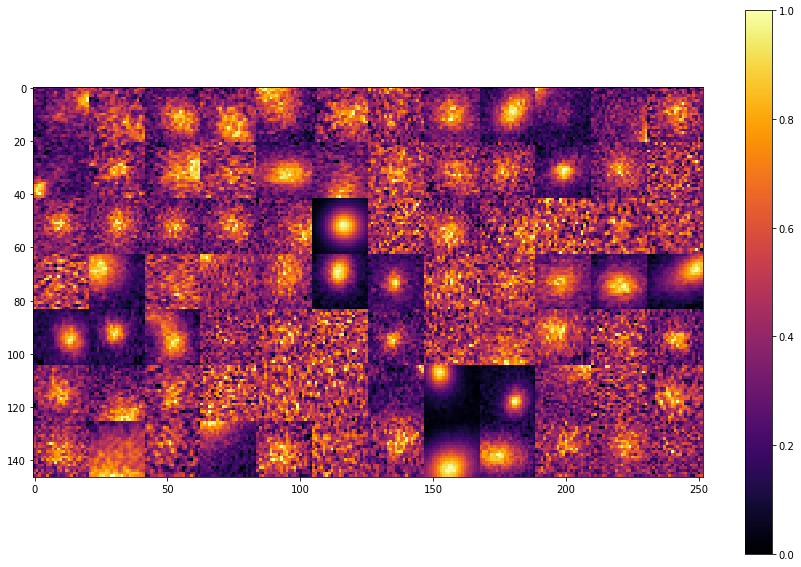

In [4]:
compiled_image = plot_epoch(sn_data, 15, normalized=True)
plt.figure(figsize=(15,10))
plt.imshow(compiled_image, cmap="inferno")
plt.colorbar()
plt.show()

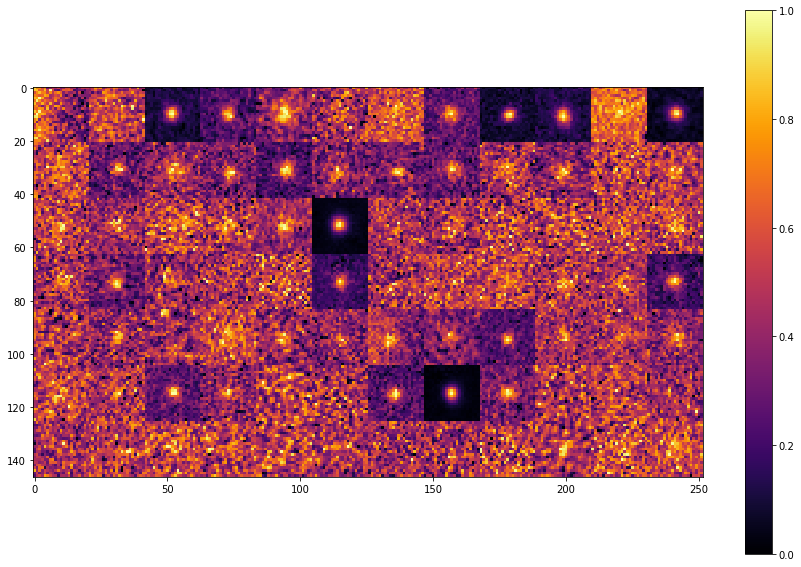

In [5]:
compiled_image = plot_epoch(sn_data, 23, image="diff", normalized=True)
plt.figure(figsize=(15,10))
plt.imshow(compiled_image, cmap="inferno")
plt.colorbar()
plt.show()

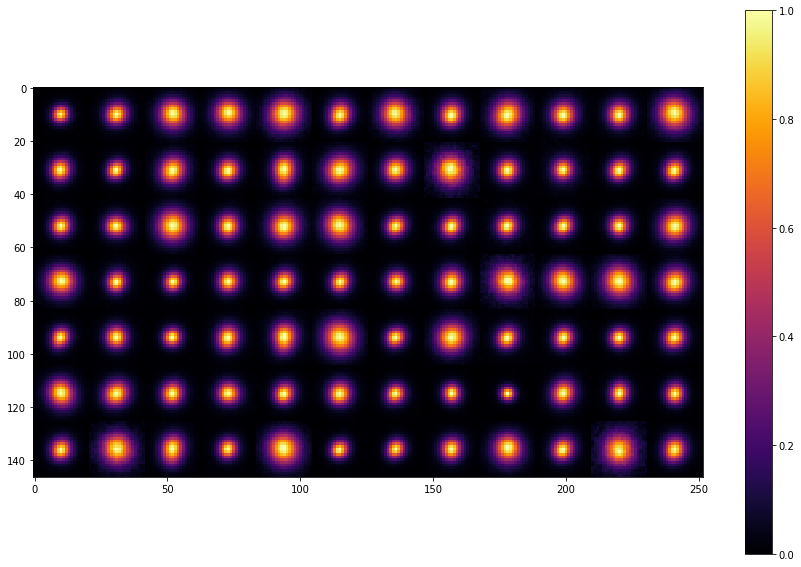

In [6]:
compiled_image = plot_epoch(sn_data, 15, image="psf", normalized=True)
plt.figure(figsize=(15,10))
plt.imshow(compiled_image, cmap="inferno")
plt.colorbar()
plt.show()

In [8]:
camera_and_obscond = np.load("camera_and_obs_cond.pkl")
print(camera_and_obscond.keys())

dict_keys(['camera_params', 'obs_conditions'])


In [19]:
camera_params = camera_and_obscond["camera_params"]
print(len(camera_params))
for i in range(5):
    print(camera_params[i])
    
obs_cond = camera_and_obscond["obs_conditions"]
print(len(obs_cond))
for key in list(obs_cond[0].keys()):
    print(key, obs_cond[0][key])

47
{'ccd_num': 1, 'gain': 4.0389999999999997, 'read_noise': 6.1392800000000003, 'saturation': 38652.0, 'zp_i': 25.313714, 'zp_u': 23.548788, 'zp_r': 25.439446, 'zp_g': 25.380079}
{'ccd_num': 5, 'gain': 4.085, 'read_noise': 6.2092000000000001, 'saturation': 45237.0, 'zp_i': 25.221156, 'zp_u': 23.479608, 'zp_r': 25.321946, 'zp_g': 25.274849}
{'ccd_num': 6, 'gain': 3.7930000000000001, 'read_noise': 5.936045, 'saturation': 50304.0, 'zp_i': 25.375757, 'zp_u': 23.645668, 'zp_r': 25.535051, 'zp_g': 25.502892}
{'ccd_num': 7, 'gain': 4.1280000000000001, 'read_noise': 6.2580479999999996, 'saturation': 43219.0, 'zp_i': 25.251208, 'zp_u': 23.370421, 'zp_r': 25.394032, 'zp_g': 25.299558}
{'ccd_num': 9, 'gain': 3.8700000000000001, 'read_noise': 5.9443200000000003, 'saturation': 46442.0, 'zp_i': 25.352422, 'zp_u': 23.996971, 'zp_r': 25.479612, 'zp_g': 25.4846}
87
sky_brightness [ 125.97147369  112.34952545  110.87813568  121.67430878  114.26612091
  109.82797241  114.78262329  118.72011566  127.60471